# This a notebook that refresh some knowledge and gaining some practice on CNN structure

Early research used fully connected networks to try to solve a wide variety of problems. But when our input is images, fully connected networks can be a poor choice. Images are very large: a single 256×256-pixel image (a common resolution for classification) has 256×256×3 inputs (3 colors for each pixel).

If this model has a single hidden layer with 1,000 hidden units, then this layer will have almost 200 million parameters (learnable values)! Since image models require quite a few layers to per‐ form well at classification, if we implemented them just using fully connected layers we would end up with billions of parameters.

With so many parameters, it would be almost impossible for us to avoid overfitting our model (overfitting is described in detail in the next chapter; it refers to when a network fails to generalize, but just memorizes outcomes). Convolutional neural networks (CNNs) provide a way for us to train superhuman image classifiers using far fewer parameters. They do this by mimicking how animals and humans see:


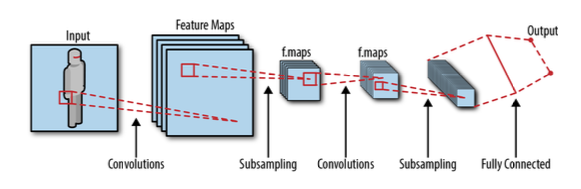

In [2]:
from IPython.display import Image
Image(filename='cnn.png')

The fundamental operation in a CNN is a convolution. Instead of applying a function to an entire input image, a convolution scans across a small window of the image at a time. At each location it applies a kernel (typically a matrix multiplication followed by an activation function, just like in a fully connected network). Individual kernels are often referred to as filters. The result of applying the kernel to the entire image is a new, possibly smaller image. For example, a common filter shape is (3, 3). If we were to apply 32 of these filters to our input image, we would need 3 * 3 * 3 (input colors) * 32 = 864 parameters—that’s a big savings over a fully connected network!


# Hasn't refresh memory yet? Then wait for it!

In [ ]:
from keras.datasets import mnist

Its a handwriting digits dataset - we are going to try detect them!

In [8]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

WHAT'S INSIDE THE DATASET??

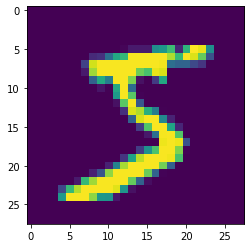

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) # I THİNK IT IS 5 :D

In [11]:
X_train.shape

(60000, 28, 28)

# Data Inside Analysis

We need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test ----> those indicates number of images). Then comes the shape of each image (28x28 ---> one image pixels). The last number is 1, which signifies that the images are greyscale.

In [12]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

So, in order to detect a pattern from image that I preferly used (also according to my research from kagglers) one-hat encoding tech. This technique: 
<br>
    For instance lets consider we took a random image from dataset which would be 2. so our vector look like this:
<br>
sample_vector = (0,0,1,.....0,0)

In [13]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Part

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

In [15]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

### Model Keywords and Type
The model type that we will be using is Sequential. What I think is that Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. So, it think its more logical.
<br>
So, important keyword kernel_size, what does it mean?
<br>
It's a filter size!!! 3 mean we have 3x3 filter size matrix.

### Flatten

In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

### Dense Layer
‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.
<br>
We will have 10 nodes in our output layer, one for each possible outcome (0–9).

In [16]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [1]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

NameError: name 'model' is not defined